In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv('College_Data',index_col=0)

In [49]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

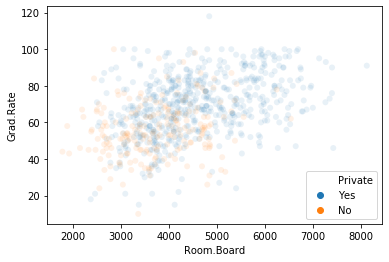

In [7]:
sns.scatterplot(x='Room.Board',y='Grad.Rate',hue='Private',data=df,alpha=0.1)

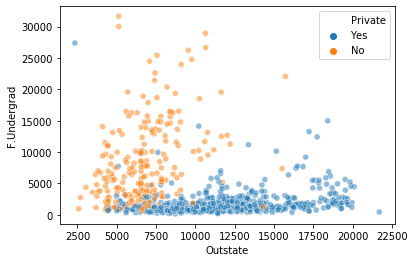

In [8]:
sns.scatterplot(x='Outstate',y='F.Undergrad',hue='Private',data=df,alpha=0.5)

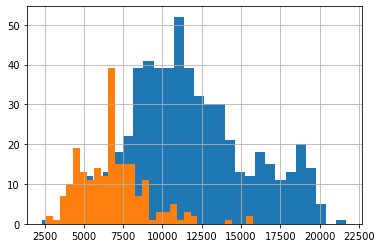

In [12]:
df[df['Private'] == 'Yes']['Outstate'].hist(bins=30)
df[df['Private'] == 'No']['Outstate'].hist(bins=30)

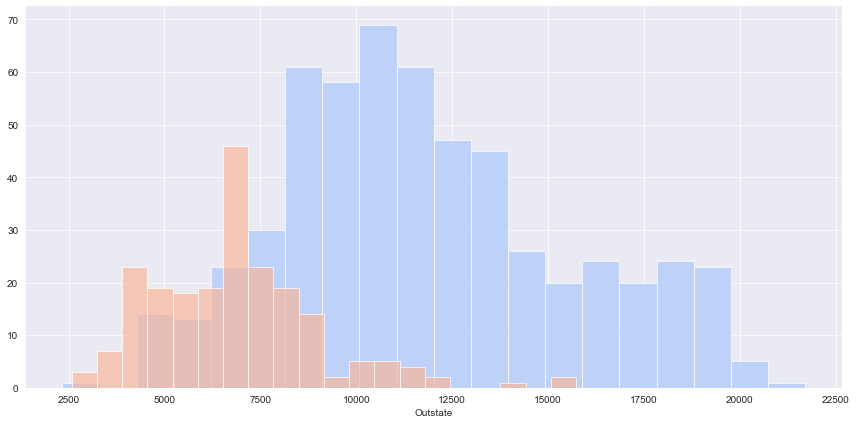

In [16]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue='Private',palette='coolwarm',height=6,aspect=2)
g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

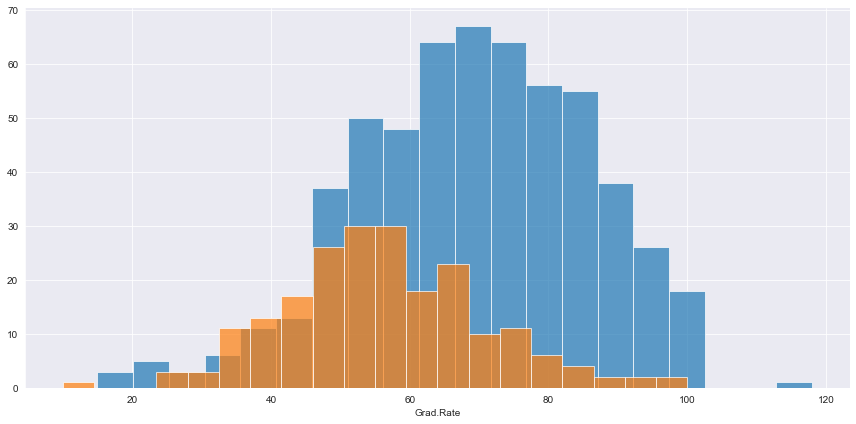

In [22]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue='Private',height = 6, aspect = 2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha = 0.7)

In [23]:
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [50]:
df['Grad.Rate']['Cazenovia College']= 100

C:\Users\muktadir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [52]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
print(kmeans.cluster_centers_)

[[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]]


In [55]:
def Converter(cluster):
    if cluster == "Yes":
        return 1
    else:
        return 0

In [57]:
df['cluster'] = df['Private'].apply(Converter)

In [58]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(df['cluster'],kmeans.labels_))
print('\n')
print(confusion_matrix(df['cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



[[138  74]
 [531  34]]
